# 1. Import the libraries, load dataset, the print shape of data, data description. 


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
nltk.download('stopwords')

import contractions

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olegkulikov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import os
path = os.getcwd() + '/'
print (path)

/Users/olegkulikov/Documents/GitHub/GreatLearning/gl-pgp-aiml-uta-intl-nov20-olegkulikovatx/NLP/


In [61]:

orig_data = pd.read_csv(path+'Tweets.csv')

In [62]:
orig_data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [63]:
print(orig_data.shape)

(14640, 15)


In [64]:
print(orig_data.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [65]:
print(orig_data.isna().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [66]:
print(orig_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# 2. Understand of data columns: 

## Create a small data set to test data set transformations

In [67]:
first5 = orig_data.head(5)
first5

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## a. Drop all other columns except “text” and “airline_sentiment”.

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

In [69]:
def my_print(a):
    """
    Function my_print prints out parameter a if global 
    variable debug is True. Otherwise does nothing\
    """
    global debug
    try: debug
    except NameError: debug=False
    if debug:
        print(a)

## disable debugging info print out
debug=True

In [70]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    """
    class ColumnDropper(columns) drops columns in the dataframe.
    columns - list of columns to be droppped
    """    
    def __init__(self, columns):
        self.columns = columns
        return
    def fit(self, X, y=None, **fit_params):
        my_print ("-- ColumnDropper::fit() --")
        # Do nothing
        return self
    def transform(self, X):
        my_print ("-- ColumnDropper::transform() --")    
        new_X = X.drop(columns=self.columns)
        return new_X

In [71]:
columns_to_drop = first5.columns
print (columns_to_drop)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [72]:
columns_to_drop = columns_to_drop.delete(1)
columns_to_drop = columns_to_drop.delete(-5)
print(columns_to_drop)

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')


In [73]:
dropper = ColumnDropper(columns_to_drop)

In [74]:
dropper.fit(first5)
first5 = dropper.transform(first5)

-- ColumnDropper::fit() --
-- ColumnDropper::transform() --


## b. Check the shape of the data.

In [75]:
print(first5.shape)

(5, 2)


## c. Print the first 5 rows of data.

In [76]:
first5

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# 3. Text pre-processing: Data preparation. 
## a. Html tag removal.
## b. Tokenization.
## c. Remove the numbers.
## d. Removal of Special Characters and Punctuations.
## e. Removal of stopwords
## f. Conversion to lowercase.
## g. Lemmatize or stemming.
## h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
## i. Print the first 5 rows of data after pre-processing.


In [77]:
import spacy
nlp = spacy.load('en', parse=True, tag=True, entity=True)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olegkulikov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    class TextPreprocessor(type, nlp) preprocesses the text in column 'text'.
    Preprocessing includes:
     a. Html tag removal.
     b. Tokenization.
     c. Removat of the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatization or stemming.
    Parameters:
    type - tells TextPreprocessor whether lemmatize or stem the text
           Values: 'lemma' or 'stem'
    nlp  - language model for lemmatization
    """    
    def __init__(self, my_type, nlp):
        self.type_ = my_type
        self.nlp_ = nlp
        self.stemmer_ = nltk.porter.PorterStemmer()
        return
    
    def remove_html(self, text):
        soup = BeautifulSoup(text, "html.parser")
        text_no_html = soup.get_text()
        return text_no_html
    
    ## If particular airline receives mostly positive/negative reviews
    ## Airline name itself may become a positive/negative marker
    ## revove airline names from the tweets
    def remove_airline_reference(self, text):
        pattern = r'@[a-zA-Z0-9]+[\t\s]+' 
        new_text = re.sub(pattern, '', text)
        return new_text
    
    def remove_contractions(self, text):
        expanded_words = []    
        for word in text.split():
          # using contractions.fix to expand the shotened words
          expanded_words.append(contractions.fix(word)) 
        return " ".join(expanded_words)         
    
    def tokenize(self, text):
        tokens = word_tokenize(text)
        return tokens
        
    
    def remove_non_ascii(self, words):
        new_words = []
        for w in words:
            w = unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8','ignore')
            new_words.append(w)
        return new_words

    def to_lower(self, words):
        new_words = []
        for w in words:
            w = w.lower()
            new_words.append(w)
        return new_words


    def remove_punctuations(self, words):
        pattern = r'[^a-zA-Z0-9\s]' 
        new_words = []
        for w in words:
            w = re.sub(pattern, '', w)
            if len(w) > 0:
                new_words.append(w)        
        return new_words

    def remove_digits(self, words):
        pattern = r'[0-9]' 
        new_words = []
        for w in words:
            w = re.sub(pattern, '', w)
            if len(w) > 0:
                new_words.append(w)        
        return new_words

    def remove_stopwords(self, words):
        stopword_list = stopwords.words('english')
        stopword_list.remove('not')
        new_words = []
        for w in words:
            if w not in stopword_list:
                new_words.append(w)
        return new_words


    def convert_to_stem(self, words):
        new_words = []
        ps = nltk.porter.PorterStemmer()
        for w in words:
            w = ps.stem(w)
            new_words.append(w)        
        return new_words


    def lemmatize(self, words):
        global nlp
        new_words = []
        twit = " ".join(words)
        text = nlp(twit)
        for w in words:
            #text = nlp(w)
            w = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
            new_words.append(w)
        return new_words


    def preprocess_text(self, text):
        new_text  = self.remove_html(text)
        #new_text  = self.remove_airline_reference(new_text)
        new_text  = self.remove_contractions(new_text)      
        words     = self.tokenize(new_text)
        words     = self.remove_non_ascii(words)
        words     = self.to_lower(words)
        words     = self.remove_punctuations(words)
        words     = self.remove_digits(words)
        words     = self.remove_stopwords(words)
        if (self.type_ == 'stem'):
            words     = self.convert_to_stem(words)
        else:
            words     = self.lemmatize(words)
        ## if tweet consists of stopwords
        ## add something neutral
        if len(words) == 0:
            words.append("ok")
        new_text  = " ".join(words)
        return new_text

    def fit(self, X, y=None, **fit_params):
        my_print ("-- TextPreprocessor::fit() -- type: {}".format(self.type_))
        ## do nothing
        return self
    
    def transform(self, X):
        my_print ("-- TextPreprocessor::transform() --")    
        new_X = X.copy()
        #self.preprocess_text('abc')
        new_X['text'] = new_X['text'].apply(self.preprocess_text)
        return new_X

    def get_params(self, deep=True):
        return {"my_type": self.type_,
               "nlp": self.nlp_}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            p = parameter
            if parameter == "my_type":
                p = "type_"
                self.type_ = value
            elif parameter == "nlp":
                p = "nlp_"
                self.nlp_ = value
            my_print("TextPreprocessor setattr {} = {}".format(p, value))
            #setattr(self, p, value)
        return self

    

In [79]:
text_prepocessor = TextPreprocessor('stem',nlp)
text_prepocessor.fit(first5)
first5_stem = text_prepocessor.transform(first5)
first5_stem

-- TextPreprocessor::fit() -- type: stem
-- TextPreprocessor::transform() --


,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plu ad commerci experi tacki
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica realli aggress blast obnoxi ente...
4,negative,virginamerica realli big bad thing


In [80]:
text_prepocessor = TextPreprocessor('lemma',nlp)
text_prepocessor.fit(first5)
first5_lemma = text_prepocessor.transform(first5)
first5_lemma

-- TextPreprocessor::fit() -- type: lemma
-- TextPreprocessor::transform() --


,airline_sentiment,text
0,neutral,virginamerica dhepburn say virginamerica dhepb...
1,positive,virginamerica plus add commercial experience t...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing virginameri...


# 4. Vectorization: 
## a. Use CountVectorizer.
## b. Use TfidfVectorizer.

In [81]:
class TextVectorzer(BaseEstimator, TransformerMixin):
    """
    class TextVectorzer(type) Vectorizes the text in column 'text'.
    Parameters:
    type - tells TextVectorzer whether to use Count or TF/IDF vectorization
           Values: 'count' or 'tfidf'
    max_features - maximun number of features
    ngram_range  - ngram range
    """    
    vectorizer_ = None
    def __init__(self, my_type, max_features, ngram_range):
        self.type_ = my_type
        self.max_features_ = max_features
        self.ngram_range_ = ngram_range
        return
    

    def fit(self, X, y=None, **fit_params):
        my_print ("-- TextVectorzer::fit() -- type: {}, max_features: {}, ngram_range: {}".format( 
                  self.type_, self.max_features_, self.ngram_range_))
        if (self.type_ == "count"):
            self.vectorizer_ = CountVectorizer(max_features=self.max_features_, ngram_range=self.ngram_range_)
        else:
            self.vectorizer_ = TfidfVectorizer(max_features=self.max_features_, ngram_range=self.ngram_range_)
        self.vectorizer_.fit(X.text)
        return self
    
    def transform(self, X):
        my_print ("-- TextVectorzer::transform() --")
        features = self.vectorizer_.transform(X['text'])
        feature_df = pd.DataFrame(features.toarray(), columns=self.vectorizer_.get_feature_names())
        new_X = feature_df.copy()
        if 'airline_sentiment' in X.columns:
            new_X['airline_sentiment'] = X['airline_sentiment'].to_numpy()
        new_X['text'] = X['text'].to_numpy()        
        return new_X
    
    def get_params(self, deep=True):
        return {"my_type": self.type_,
               "max_features": self.max_features_,
               "ngram_range": self.ngram_range_}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            if parameter == "my_type":
                p = "type_"
                self.type_ = value
            elif parameter == "max_features":
                p = "max_features_"
                self.max_features_ = value
            elif parameter == "ngram_range":
                p = "ngram_range_"
                self.ngram_range_ = value
            my_print("TextVectorzer setattr {} = {}".format(p, value))    
            #setattr(self, parameter, value)
        return self
    

In [82]:
vectorizer = TextVectorzer('count', 10, (1,1))
vectorizer.fit(first5_lemma)
first5_count = vectorizer.transform(first5_lemma)
print(first5_count)

-- TextVectorzer::fit() -- type: count, max_features: 10, ngram_range: (1, 1)
-- TextVectorzer::transform() --
   aggressive  blast  entertainment  face  guest  little  obnoxious  really  \
0           0      0              0     0      0       0          0       0   
1           0      0              0     0      0       0          0       0   
2           0      0              0     0      0       0          0       0   
3          10     10             10    10     10      10         10      10   
4           0      0              0     0      0       0          0       5   

   recourse  virginamerica airline_sentiment  \
0         0              3           neutral   
1         0              6          positive   
2         0              9           neutral   
3        10             10          negative   
4         0              5          negative   

                                                text  
0  virginamerica dhepburn say virginamerica dhepb...  
1  virginameric

In [83]:
vectorizer = TextVectorzer('tfidf', 10, (1,1))
vectorizer.fit(first5_lemma)
first5_count = vectorizer.transform(first5_lemma)
print(first5_count)

-- TextVectorzer::fit() -- type: tfidf, max_features: 10, ngram_range: (1, 1)
-- TextVectorzer::transform() --
   aggressive     blast  entertainment      face     guest    little  \
0    0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
3    0.335616  0.335616       0.335616  0.335616  0.335616  0.335616   
4    0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   

   obnoxious    really  recourse  virginamerica airline_sentiment  \
0   0.000000  0.000000  0.000000       1.000000           neutral   
1   0.000000  0.000000  0.000000       1.000000          positive   
2   0.000000  0.000000  0.000000       1.000000           neutral   
3   0.335616  0.270773  0.335616       0.159923          negative   
4   0.000000  0.861037  0.000000       0.508542          negative   

                                         

## Test classes in a pipeline

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [85]:
dropper = ColumnDropper(columns_to_drop)
text_prepocessor = TextPreprocessor(my_type='lemma', nlp='nlp')
vectorizer = TextVectorzer('tfidf', 8, (1,1))
dropper2 = ColumnDropper(['text'])
pipeline = make_pipeline(dropper, text_prepocessor, vectorizer, dropper2)
sample_data = orig_data.sample(5).drop(columns='airline_sentiment')
pipeline.fit(sample_data)
transformed_sample_data = pipeline.transform(sample_data)
print(transformed_sample_data)

-- ColumnDropper::fit() --
-- ColumnDropper::transform() --
-- TextPreprocessor::fit() -- type: lemma
-- TextPreprocessor::transform() --
-- TextVectorzer::fit() -- type: tfidf, max_features: 8, ngram_range: (1, 1)
-- TextVectorzer::transform() --
-- ColumnDropper::fit() --
-- ColumnDropper::transform() --
-- TextPreprocessor::transform() --
-- TextVectorzer::transform() --
-- ColumnDropper::transform() --
        eat    entire    flight      food      meal       not     serve  \
0  0.000000  0.000000  0.707107  0.000000  0.000000  0.707107  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.398352  0.398352  0.321388  0.398352  0.398352  0.321388  0.398352   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

   southwestair  
0           0.0  
1           1.0  
2           1.0  
3           0.0  
4           0.0  


## TODO: count words and find an optimal number of features

# 5. Fit and evaluate the model using both types of vectorization. 


## Split data into training and test sets

In [86]:
X = orig_data.drop(columns='airline_sentiment')
y = orig_data['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

In [87]:
from sklearn import metrics as metrics

In [88]:
def get_metrics_score(model, X_train, y_train, pred_train, X_test, y_test, pred_test, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    average = 'macro'
    
    #Predicting on train and tests
    #pred_train = model.predict(X_train)
    #pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = metrics.accuracy_score(y_train, pred_train)
    test_acc  = metrics.accuracy_score(y_test,  pred_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train,average=average)
    test_recall = metrics.recall_score(y_test,pred_test,average=average)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train,average=average)
    test_precision = metrics.precision_score(y_test,pred_test,average=average)
    
    train_f1 = metrics.f1_score(y_train,pred_train,average=average)
    test_f1 = metrics.f1_score(y_test,pred_test,average=average)
    
    train_cm = metrics.confusion_matrix(y_train, pred_train)
    test_cm  = metrics.confusion_matrix(y_test, pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,\
                       test_precision, train_f1, test_f1, train_cm, test_cm))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
        print("Confusion matrix on train set:\n", train_cm)
        print("Confusion matrix on test set:\n", test_cm)
        print("Classification report on Test set:\n", metrics.classification_report(y_test, pred_test, \
                target_names=['negative', 'neutral', 'positive']))
    
    return score_list # returning the list with train and test scores

In [89]:
def make_confusion_matrix(cm,labels=['negative', 'neutral', 'positive']):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Negative","Actual - Neutral", "Actual - Positive"]],
                  columns = [i for i in ["Predicted - Negative","Predicted - Neutral", "Predicted - Positive"]])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

## Build random forest model

In [90]:
from sklearn.ensemble import RandomForestClassifier


In [91]:
import time

In [92]:
debug = False

In [93]:
dropper = ColumnDropper(columns_to_drop)
text_prepocessor = TextPreprocessor('stem', nlp)
vectorizer = TextVectorzer('count', 1000, (1,2))
dropper2 = ColumnDropper(['text'])
forest = RandomForestClassifier(n_estimators = 200,n_jobs=16, class_weight='balanced', random_state=1) 
model = make_pipeline(dropper, text_prepocessor, vectorizer, dropper2, forest)

In [94]:
start = time.time()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

rf_score = get_metrics_score(model, X_train, y_train, pred_train, X_test,y_test, pred_test)
finish = time.time()
print ("Elapsed time {} seconds".format(int(finish-start)))

Accuracy on training set :  0.9889856557377049
Accuracy on test set :  0.7636612021857924
Recall on training set :  0.9871308669308076
Recall on test set :  0.6717890633158271
Precision on training set :  0.9806727707006369
Precision on test set :  0.6974350805446843
F1 on training set :  0.9838627168982707
F1 on test set :  0.6826233029962062
Confusion matrix on train set:
 [[7280   50   12]
 [   0 2437   42]
 [   0   25 1866]]
Confusion matrix on test set:
 [[1631  140   65]
 [ 232  306   82]
 [ 102   71  299]]
Classification report on Test set:
               precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1836
     neutral       0.59      0.49      0.54       620
    positive       0.67      0.63      0.65       472

    accuracy                           0.76      2928
   macro avg       0.70      0.67      0.68      2928
weighted avg       0.75      0.76      0.76      2928

Elapsed time 19 seconds


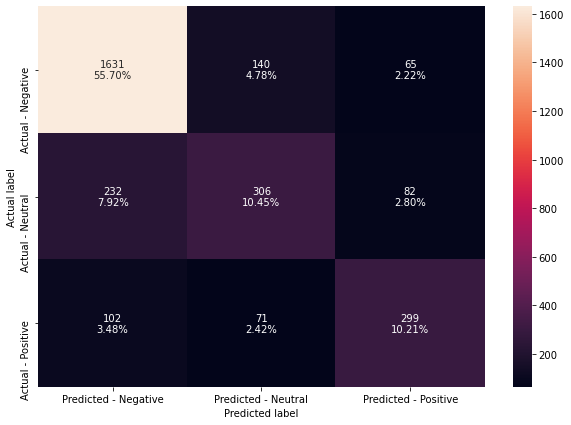

In [95]:
make_confusion_matrix(rf_score[-1])

In [96]:
dropper = ColumnDropper(columns_to_drop)
text_prepocessor = TextPreprocessor('lemma', nlp)
vectorizer = TextVectorzer('tfidf', 1000, (1,2))
dropper2 = ColumnDropper(['text'])
forest = RandomForestClassifier(n_estimators = 200,n_jobs=16, class_weight='balanced', random_state=1) 
model2 = make_pipeline(dropper, text_prepocessor, vectorizer, dropper2, forest)

In [97]:
start = time.time()

model2.fit(X_train, y_train)

pred_train2 = model2.predict(X_train)
pred_test2 = model2.predict(X_test)

rf_score2 = get_metrics_score(model2, X_train, y_train, pred_train2, X_test,y_test, pred_test2)

finish = time.time()
print ("Elapsed time {} seconds".format(int(finish-start)))


Accuracy on training set :  0.987363387978142
Accuracy on test set :  0.7691256830601093
Recall on training set :  0.9853667498716892
Recall on test set :  0.6624013959713849
Precision on training set :  0.9774044457561106
Precision on test set :  0.710471623755549
F1 on training set :  0.9813073561485887
F1 on test set :  0.6816321721735298
Confusion matrix on train set:
 [[7273   49   20]
 [   1 2421   57]
 [   0   21 1870]]
Confusion matrix on test set:
 [[1673  112   51]
 [ 252  298   70]
 [ 114   77  281]]
Classification report on Test set:
               precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1836
     neutral       0.61      0.48      0.54       620
    positive       0.70      0.60      0.64       472

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928

Elapsed time 132 seconds


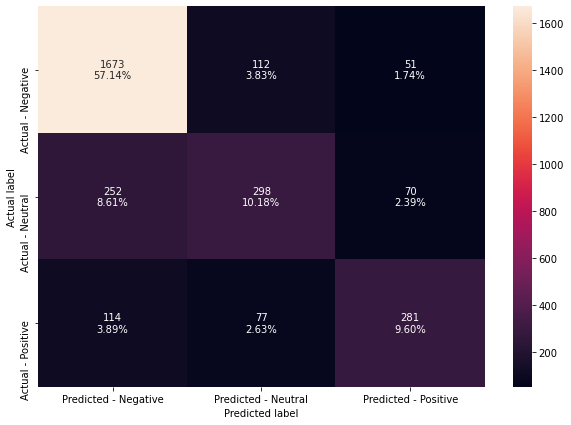

In [98]:
make_confusion_matrix(rf_score2[-1])

## Random search on Random forest models

In [128]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [129]:
n_iter = 10
n_jobs = 4

In [130]:
#my_type, max_features, ngram_range
rf_param_grid = {\
                 'textpreprocessor__my_type' : ['stem','lemma'], 
                 'textpreprocessor__nlp' : [nlp],
                 'textvectorzer__my_type' : ['count', 'tfidf'],
                 'textvectorzer__max_features' : stats.randint(500,10000),
                 'textvectorzer__ngram_range' : [(1,2), (1,3), (2,3), (2,2)],                   
                 'randomforestclassifier__class_weight':['balanced', None],
                 'randomforestclassifier__n_estimators': stats.randint(50,200),
                 'randomforestclassifier__max_features' : stats.uniform(0.6,0.4),
                 'randomforestclassifier__max_samples' : stats.uniform(0.6,0.4),
                 'randomforestclassifier__max_depth' : stats.randint(5,15),
                 'randomforestclassifier__n_jobs' : [16],               
                }


In [131]:
from sklearn.metrics import make_scorer

#scorer = make_scorer(metrics.recall_score, average='macro')
#
#grid = RandomizedSearchCV(model , param_distributions=rf_param_grid, cv = 4, n_jobs=n_jobs, n_iter=n_iter,\
#                    scoring=scorer, random_state=1)
#
start = time.time()
#result= grid.fit( X_train, y_train) 

#rf_rand_model = grid.best_estimator_

Randomized searchtake about 7 hours to complete. So we commented out the search process and reuse pre-calculated result in the cell below:

In [132]:
#Results of random search:
rf = RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features=0.8205299764791811,
                       max_samples=0.6280325984130516, n_estimators=75,
                       n_jobs=16, random_state=1)
tv = TextVectorzer(max_features=5506, my_type='tfidf', ngram_range=(1, 2)) 
tp = TextPreprocessor(my_type='lemma',
                 nlp=nlp)
rf_rand_model = make_pipeline(dropper, tp, tv, dropper2, rf)



rf_rand_model.fit(X_train, y_train)

Pipeline(steps=[('columndropper-1',
                 ColumnDropper(columns=Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object'))),
                ('textpreprocessor',
                 TextPreprocessor(...
                                  nlp=<spacy.lang.en.English object at 0x7fe69bb6dc70>)),
                ('textvectorzer',
                 TextVectorzer(max_features=5506, my_type='tfidf',
                               ngram_range=(1, 2))),
                ('columndropper-2', ColumnDropper(columns=['text'])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=14,
                                        max_features=0.8205299764791811,
                                        max_

In [133]:

pred_train_rand_rf = rf_rand_model.predict(X_train)
pred_test_rand_rf = rf_rand_model.predict(X_test)

rf_rand_score = get_metrics_score(rf_rand_model, X_train, y_train, pred_train_rand_rf, X_test,y_test, pred_test_rand_rf)

finish = time.time()
print ("Elapsed time {} seconds".format(int(finish-start)))

Accuracy on training set :  0.6804132513661202
Accuracy on test set :  0.6502732240437158
Recall on training set :  0.6914543783865034
Recall on test set :  0.6515643729901495
Precision on training set :  0.6778640456915395
Precision on test set :  0.636348014788875
F1 on training set :  0.6579801758207066
F1 on test set :  0.6214431487082471
Confusion matrix on train set:
 [[4830 2210  302]
 [ 360 1941  178]
 [ 130  563 1198]]
Confusion matrix on test set:
 [[1178  560   98]
 [ 120  445   55]
 [  52  139  281]]
Classification report on Test set:
               precision    recall  f1-score   support

    negative       0.87      0.64      0.74      1836
     neutral       0.39      0.72      0.50       620
    positive       0.65      0.60      0.62       472

    accuracy                           0.65      2928
   macro avg       0.64      0.65      0.62      2928
weighted avg       0.73      0.65      0.67      2928

Elapsed time 151 seconds


In [134]:
print(rf_rand_model[-1], "\n", rf_rand_model[-3], "\n", rf_rand_model[-4])

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features=0.8205299764791811,
                       max_samples=0.6280325984130516, n_estimators=75,
                       n_jobs=16, random_state=1) 
 TextVectorzer(max_features=5506, my_type='tfidf', ngram_range=(1, 2)) 
 TextPreprocessor(my_type='lemma',
                 nlp=<spacy.lang.en.English object at 0x7fe69bb6dc70>)


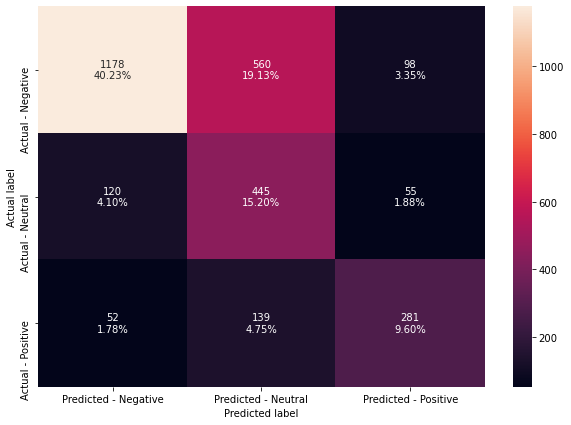

In [135]:
make_confusion_matrix(rf_rand_score[-1])

# 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. 


In [136]:
result_df = X_test.copy()

In [137]:
result_df['Y'] = y_test
result_df['predicted_rf'] = pred_test
result_df['correct'] = (result_df['Y'] == result_df['predicted_rf'])

In [138]:
result_df.isna().sum()

tweet_id                           0
airline_sentiment_confidence       0
negativereason                  1092
negativereason_confidence        810
airline                            0
airline_sentiment_gold          2924
name                               0
negativereason_gold             2925
retweet_count                      0
text                               0
tweet_coord                     2728
tweet_created                      0
tweet_location                   932
user_timezone                    938
Y                                  0
predicted_rf                       0
correct                            0
dtype: int64

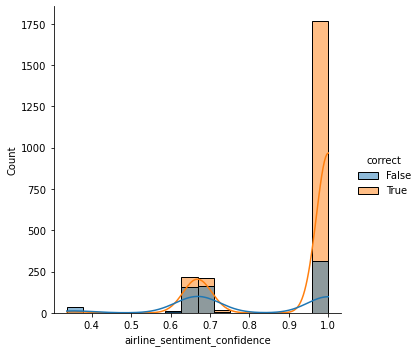

In [139]:
sns.displot(data=result_df, x = 'airline_sentiment_confidence', hue='correct', kde=True)

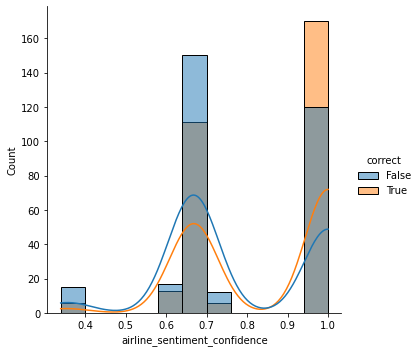

In [140]:
sns.displot(data=result_df[result_df['Y']=='neutral'], x = 'airline_sentiment_confidence', hue='correct', kde=True)

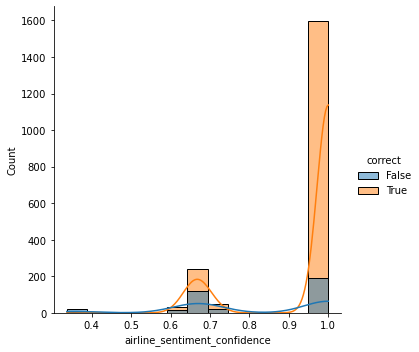

In [141]:
sns.displot(data=result_df[result_df['Y']!='neutral'], x = 'airline_sentiment_confidence', hue='correct', kde=True)

The higher *airline_sentiment_confidence*, the better we can identify sentiment. Which means our model correctly identifies strongly positive, negative and neutral tweets, but having trouble identifying tweets with weak sentiment. This trend is stronger for non-neutral tweets.

<AxesSubplot:xlabel='airline', ylabel='count'>

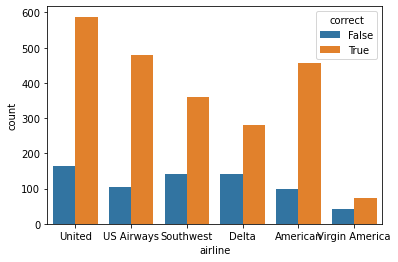

In [142]:
sns.countplot(data=result_df, x = 'airline', hue='correct')

Classification accuracy doesn't depend on airline. Looks like customer have no pre-judjements about airlines

<AxesSubplot:xlabel='count', ylabel='negativereason'>

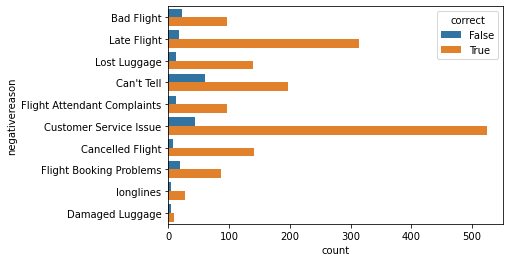

In [143]:
sns.countplot(data=result_df, y = 'negativereason', hue='correct')

The model correcly classifies negative tweets about late and cancelled flights and customer service issues. However, it has trouble with classification of tweets related to bad fliht experience, and when the reason for negative tweet is unclear. 